In [2]:
!pip install CoolProp

Problem 7-190 from Cengels Thermodynamics 9th Edition

Air enters a two-stage compressor at 100 kPa and 27°C and is compressed to 625 kPa. The pressure ratio across each stage is the same, and the air is cooled to the initial temperature between the two stages. 

- Assuming the compression process to be isentropic, determine the power input to the compressor for a mass flow rate of 0.15 kg/s.
- What would your answer be if only one stage of compression were used?



In [3]:
from CoolProp.CoolProp import PropsSI

In [4]:
fluid = 'air'
mdot_kgPerS = 0.15

In [5]:
p1_Pa = 100e3
T1_C = 27
T1_K = T1_C +273.15

pressureRatio = 2.5

p2_Pa = p1_Pa * pressureRatio
p3_Pa = p2_Pa

T3_C = 27
T3_K = T3_C + 273.15

p4_Pa = p3_Pa * pressureRatio; print(p4_Pa)

625000.0


In [12]:
h1_JperKg = PropsSI('H','P',p1_Pa,'T',T1_K,fluid) #; print(h1_JperKg)
s1_JperKgperK = PropsSI('S','P',p1_Pa,'T',T1_K,fluid) # ; print(s1_JperKgperK)

s2_JperKgperK = s1_JperKgperK
h2_JperKg = PropsSI('H','P',p2_Pa,'S',s2_JperKgperK,fluid) #; print(h2_JperKg)
T2_K = PropsSI('T','P',p2_Pa,'S',s2_JperKgperK,fluid) #; print(h2_JperKg)

h3_JperKg = PropsSI('H','P',p3_Pa,'T',T3_K,fluid); # print(h2_JperKg)
s3_JperKgperK = PropsSI('S','P',p3_Pa,'T',T3_K,fluid)

s4_JperKgperK = s3_JperKgperK
h4_JperKg = PropsSI('H','P',p4_Pa,'S',s4_JperKgperK,fluid); # print(h2_JperKg)
T4_K = PropsSI('T','P',p4_Pa,'S',s4_JperKgperK,fluid)

In [13]:
Wdot_W = mdot_kgPerS*((h2_JperKg - h1_JperKg)+(h4_JperKg - h3_JperKg))
Wdot_kW = Wdot_W/1000# ; print(Wdot_kW)
print('(a) Wdot_kW = {0:1.1f} kW.'.format(Wdot_kW))


(a) Wdot_kW = 27.1 kW.


Now we can see how much work we would have to do if we were to do the same process with a single compressor.

In [18]:
s2_JperKgperK_ = s1_JperKgperK
h2_JperKg_ = PropsSI('H','P',p4_Pa,'S',s2_JperKgperK_,fluid) #; print(h2_JperKg)
T2_K_ = PropsSI('T','P',p4_Pa,'S',s2_JperKgperK_,fluid) #; print(h2_JperKg)

In [19]:
Wdot_W_ = mdot_kgPerS*((h2_JperKg_ - h1_JperKg))
Wdot_kW_ = Wdot_W_/1000# ; print(Wdot_kW)
print('(b) Wdot_kW = {0:1.1f} kW.'.format(Wdot_kW_))

(b) Wdot_kW = 31.1 kW.


In [20]:
import CoolProp
from CoolProp.Plots import PropertyPlot

import numpy as np
import matplotlib.pyplot as plt

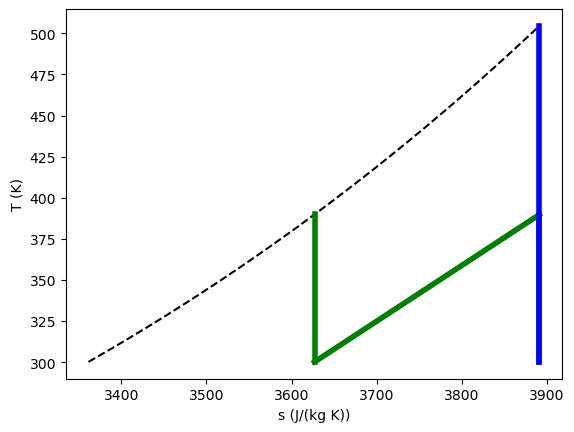

In [25]:
plt.figure()
plt.clf()
T = np.linspace(T1_K, T2_K_, 500) # range of temperatures
for P in [p4_Pa]: 
    S = [PropsSI('S','P',P,'T',t,fluid) for t in T]
    plt.plot(S, T, 'k--')
    
# saturated vapor and liquid entropy lines
# Tsat = np.linspace(217, 304, 1000) # range of temperatures
# svap = [PropsSI('S','T',t,'Q',1,fluid) for t in Tsat]
# sliq = [PropsSI('S','T',t,'Q',0,fluid) for t in Tsat]

# plt.plot(svap, Tsat, 'k-')
# plt.plot(sliq, Tsat, 'k-')

plt.xlabel('s (J/(kg K))')
plt.ylabel('T (K)')
# plt.savefig('carbonDioxideRefrigerationTS.png')

plt.plot([s1_JperKgperK, s2_JperKgperK], [T1_K, T2_K], 'g-', lw=4) # Process 1
plt.plot([s2_JperKgperK, s3_JperKgperK], [T2_K, T3_K], 'g-', lw=4) # Process 1
plt.plot([s3_JperKgperK, s4_JperKgperK], [T3_K, T4_K], 'g-', lw=4) # Process 1

plt.plot([s1_JperKgperK, s2_JperKgperK], [T1_K, T2_K_], 'b-', lw=4) # Process 2

#plt.savefig('multistageCompression.eps', format='eps')
plt.savefig('multistageCompression.png', format='png')